In [1]:
# -*- coding: utf-8
# Reinaldo Chaves (@paidatocandeira)
# Acessa o arquivo criado com pagamentos de empenho da covid19
# E faz diversas estatísticas
#

In [2]:
import pandas as pd

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
kwargs = {'sep': ',', 'dtype': str, 'encoding': 'utf-8'}
pagamentos_covid19 = pd.read_csv("resultados/pagamentos_covid19/pagamentos_feitos_de_empenhos_covid19_ate_12_junho_2020.csv", **kwargs)

In [5]:
# Carrega nomes de colunas

In [6]:
list(pagamentos_covid19.columns.values.tolist())

['Id Empenho',
 'Código Empenho',
 'Código Empenho Resumido',
 'Data Emissão_x',
 'Código Tipo Documento_x',
 'Tipo Documento_x',
 'Tipo Empenho',
 'Espécie Empenho',
 'Código Órgão Superior_x',
 'Órgão Superior_x',
 'Código Órgão_x',
 'Órgão_x',
 'Código Unidade Gestora_x',
 'Unidade Gestora_x',
 'Código Gestão_x',
 'Gestão_x',
 'Código Favorecido_x',
 'Favorecido_x',
 'Observação_x',
 'Código Esfera Orçamentária',
 'Esfera Orçamentária',
 'Código Tipo Crédito',
 'Tipo Crédito',
 'Código Grupo Fonte Recurso',
 'Grupo Fonte Recurso',
 'Código Fonte Recurso',
 'Fonte Recurso',
 'Código Unidade Orçamentária',
 'Unidade Orçamentária',
 'Código Função',
 'Função',
 'Código SubFunção',
 'SubFunção',
 'Código Programa',
 'Programa',
 'Código Ação',
 'Ação',
 'Linguagem Cidadã',
 'Código Subtítulo (Localizador)',
 'Subtítulo (Localizador)',
 'Código Plano Orçamentário_x',
 'Plano Orçamentário_x',
 'Código Programa Governo_x',
 'Nome Programa Governo_x',
 'Autor Emenda',
 'Código Categoria de 

In [7]:
# Quantidade de favorecidos nos pagamentos

In [8]:
a = len(pagamentos_covid19['Favorecido_x'].value_counts())
a

2894

In [9]:
# Transforma em numero campos de valores

In [10]:
pagamentos_covid19['Valor Original do Empenho'] = pagamentos_covid19['Valor Original do Empenho'].str.replace(',','.')
pagamentos_covid19['Valor Original do Empenho'] = pagamentos_covid19['Valor Original do Empenho'].astype('float64') 

pagamentos_covid19['Valor do Empenho Convertido pra R$'] = pagamentos_covid19['Valor do Empenho Convertido pra R$'].str.replace(',','.')
pagamentos_covid19['Valor do Empenho Convertido pra R$'] = pagamentos_covid19['Valor do Empenho Convertido pra R$'].astype('float64') 

pagamentos_covid19['Valor Utilizado na Conversão_x'] = pagamentos_covid19['Valor Utilizado na Conversão_x'].str.replace(',','.')
pagamentos_covid19['Valor Utilizado na Conversão_x'] = pagamentos_covid19['Valor Utilizado na Conversão_x'].astype('float64') 

pagamentos_covid19['Valor Pago (R$)'] = pagamentos_covid19['Valor Pago (R$)'].str.replace(',','.')
pagamentos_covid19['Valor Pago (R$)'] = pagamentos_covid19['Valor Pago (R$)'].astype('float64') 
pagamentos_covid19.rename(columns = {'Valor Pago (R$)':'valor_pago_em_real'},inplace = True)

pagamentos_covid19['Valor Restos a Pagar Inscritos (R$)'] = pagamentos_covid19['Valor Restos a Pagar Inscritos (R$)'].str.replace(',','.')
pagamentos_covid19['Valor Restos a Pagar Inscritos (R$)'] = pagamentos_covid19['Valor Restos a Pagar Inscritos (R$)'].astype('float64') 

pagamentos_covid19['Valor Restos a Pagar Cancelado (R$)'] = pagamentos_covid19['Valor Restos a Pagar Cancelado (R$)'].str.replace(',','.')
pagamentos_covid19['Valor Restos a Pagar Cancelado (R$)'] = pagamentos_covid19['Valor Restos a Pagar Cancelado (R$)'].astype('float64') 

pagamentos_covid19['Valor Restos a Pagar Pagos (R$)'] = pagamentos_covid19['Valor Restos a Pagar Pagos (R$)'].str.replace(',','.')
pagamentos_covid19['Valor Restos a Pagar Pagos (R$)'] = pagamentos_covid19['Valor Restos a Pagar Pagos (R$)'].astype('float64') 

pagamentos_covid19['Valor Original do Pagamento'] = pagamentos_covid19['Valor Original do Pagamento'].str.replace(',','.')
pagamentos_covid19['Valor Original do Pagamento'] = pagamentos_covid19['Valor Original do Pagamento'].astype('float64') 

pagamentos_covid19['Valor do Pagamento Convertido pra R$'] = pagamentos_covid19['Valor do Pagamento Convertido pra R$'].str.replace(',','.')
pagamentos_covid19['Valor do Pagamento Convertido pra R$'] = pagamentos_covid19['Valor do Pagamento Convertido pra R$'].astype('float64') 

pagamentos_covid19['Valor Utilizado na Conversão_y'] = pagamentos_covid19['Valor Utilizado na Conversão_y'].str.replace(',','.')
pagamentos_covid19['Valor Utilizado na Conversão_y'] = pagamentos_covid19['Valor Utilizado na Conversão_y'].astype('float64') 

In [11]:
pagamentos_covid19['valor_pago_em_real'].sum()

12553069263.83

In [12]:
pagamentos_covid19['Valor Original do Empenho'].sum()

36767155197.130005

In [13]:
pagamentos_covid19['Valor do Empenho Convertido pra R$'].sum()

36097238896.41

In [14]:
# Média de valores pagos

In [15]:
pagamentos_covid19['valor_pago_em_real'].mean()

924311.1158110596

In [16]:
# Mediana de valores pagos

In [17]:
pagamentos_covid19['valor_pago_em_real'].median()

2212.5

In [18]:
# Moda de valores pagos

In [19]:
pagamentos_covid19['valor_pago_em_real'].mode()

0   442.50
dtype: float64

In [20]:
procura = pagamentos_covid19[(pagamentos_covid19['valor_pago_em_real'] == 442.50)]

In [21]:
procura.shape

(338, 103)

In [22]:
procura[["Data Emissão_x","Código Empenho", "Id Empenho", "Órgão_x", "Unidade Gestora_x", "Código Favorecido_x", "Favorecido_x", "Valor do Empenho Convertido pra R$", "valor_pago_em_real", "Valor Restos a Pagar Inscritos (R$)", "Observação_x", "Observação_y",  "Modalidade de Licitação"]]

,Data Emissão_x,Código Empenho,Id Empenho,Órgão_x,Unidade Gestora_x,Código Favorecido_x,Favorecido_x,Valor do Empenho Convertido pra R$,valor_pago_em_real,Valor Restos a Pagar Inscritos (R$),Observação_x,Observação_y,Modalidade de Licitação
136,08/04/2020,194010192082020NE000002,180100348,Fundação Nacional do Índio,COORD. REG. CENTRO-LESTE DO PARA/PA,PFCOL4010,FUNDACAO NACIONAL DO INDIO - DIARIAS DE COLABO...,"10,620.00",442.50,0.00,08748.000961/2019-19 - DIARIAS DE COLABORADOR ...,PROC 001194/20 DOC GERADO PELO SCDP. PCDP 0011...,Não se Aplica
137,08/04/2020,194010192082020NE000002,180100348,Fundação Nacional do Índio,COORD. REG. CENTRO-LESTE DO PARA/PA,PFCOL4010,FUNDACAO NACIONAL DO INDIO - DIARIAS DE COLABO...,"10,620.00",442.50,0.00,08748.000961/2019-19 - DIARIAS DE COLABORADOR ...,PROC 001569/20 DOC GERADO PELO SCDP. PCDP 0015...,Não se Aplica
1480,24/03/2020,120638000012020NE000019,160400393,Comando da Aeronáutica,GRUPAMENTO DE APOIO DE CAMPO GRANDE,120638,GRUPAMENTO DE APOIO DE CAMPO GRANDE,"31,405.70",442.50,0.00,DIARIAS DE MILITARES DA ALA-5.,PROC 009243/20 DOC GERADO PELO SCDP. PCDP 0092...,Não se Aplica
1481,24/03/2020,120638000012020NE000019,160400393,Comando da Aeronáutica,GRUPAMENTO DE APOIO DE CAMPO GRANDE,120638,GRUPAMENTO DE APOIO DE CAMPO GRANDE,"31,405.70",442.50,0.00,DIARIAS DE MILITARES DA ALA-5.,PROC 009241/20 DOC GERADO PELO SCDP. PCDP 0092...,Não se Aplica
1482,24/03/2020,120638000012020NE000019,160400393,Comando da Aeronáutica,GRUPAMENTO DE APOIO DE CAMPO GRANDE,120638,GRUPAMENTO DE APOIO DE CAMPO GRANDE,"31,405.70",442.50,0.00,DIARIAS DE MILITARES DA ALA-5.,PROC 009238/20 DOC GERADO PELO SCDP. PCDP 0092...,Não se Aplica
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9289,16/04/2020,194151192082020NE000032,172900706,Fundação Nacional do Índio,FUNAI-DIRETORIA DE PROTEÇÃO TERRITORIAL,PF0023COV,AUXILIO FINACEIRO - ACAO DE COMBATE AO COVID 19,"130,000.00",442.50,0.00,COBRIR DESPESAS COM DIARIAS DE SERVIDOR E DE C...,PROC 001056/20 DOC GERADO PELO SCDP. PCDP 0010...,Não se Aplica
9302,16/04/2020,194151192082020NE000032,172900706,Fundação Nacional do Índio,FUNAI-DIRETORIA DE PROTEÇÃO TERRITORIAL,PF0023COV,AUXILIO FINACEIRO - ACAO DE COMBATE AO COVID 19,"130,000.00",442.50,0.00,COBRIR DESPESAS COM DIARIAS DE SERVIDOR E DE C...,PROC 000584/20-1C DOC GERADO PELO SCDP. PCDP 0...,Não se Aplica
9676,09/04/2020,200117000012020NE000126,176300500,Departamento de Polícia Rodoviária Federal,SUPERINTENDENCIA REG. POL. RODV. FEDERAL-SP,-11,Informação protegida por sigilo nos termos da ...,"95,121.60",442.50,0.00,Informação protegida por sigilo nos termos da ...,Informação protegida por sigilo nos termos da ...,Não se Aplica
10515,12/03/2020,120006000012020NE000025,155306009,Comando da Aeronáutica,GRUPAMENTO DE APOIO DE BRASILIA,120006,GRUPAMENTO DE APOIO DE BRASILIA,"8,000.00",442.50,0.00,ATENDER AS NECESSIDADES DA SEFA ...,PAGAMENTO DE DIARIA - OPERACAO REGRESSO A PAT...,Não se Aplica


In [23]:
# Maior valor originalmente empenhado

In [24]:
pagamentos_covid19['Valor do Empenho Convertido pra R$'].max()

694320000.0

In [25]:
pagamentos_covid19.loc[pagamentos_covid19['Valor do Empenho Convertido pra R$'].idxmax()][["Data Emissão_x", "Código Empenho", "Id Empenho", "Órgão_x", "Unidade Gestora_x", "Código Favorecido_x", "Favorecido_x", "Valor do Empenho Convertido pra R$", "valor_pago_em_real", "Valor Restos a Pagar Inscritos (R$)", "Observação_x", "Observação_y", "Modalidade de Licitação"]]

Data Emissão_x                                                                03/04/2020
Código Empenho                                                   250005000012020NE000096
Id Empenho                                                                     176600022
Órgão_x                                    Ministério da Saúde - Unidades com vínculo di
Unidade Gestora_x                              DEPARTAMENTO DE LOGISTICA EM SAUDE - DLOG
Código Favorecido_x                                                            EX2590112
Favorecido_x                                          GLOBAL BASE DEVELOPMENT HK LIMITED
Valor do Empenho Convertido pra R$                                        694,320,000.00
valor_pago_em_real                                                         21,965,856.00
Valor Restos a Pagar Inscritos (R$)                                                 0.00
Observação_x                           ATNDER DESPESAS COM AQUISICAO DE MASCARA SMS 3...
Observação_y         

In [26]:
# Menor valor originalmente empenhado

In [27]:
pagamentos_covid19['Valor do Empenho Convertido pra R$'].min()

1.0

In [28]:
pagamentos_covid19.loc[pagamentos_covid19['Valor do Empenho Convertido pra R$'].idxmin()][["Data Emissão_x","Código Empenho", "Id Empenho", "Órgão_x", "Unidade Gestora_x", "Código Favorecido_x", "Favorecido_x", "Valor do Empenho Convertido pra R$", "valor_pago_em_real", "Valor Restos a Pagar Inscritos (R$)", "Observação_x", "Observação_y", "Modalidade de Licitação"]]

Data Emissão_x                                                                24/03/2020
Código Empenho                                                   155001152752020NE516283
Id Empenho                                                                     167200532
Órgão_x                                             Hospital de Clínicas de Porto Alegre
Unidade Gestora_x                                   HOSPITAL DE CLINICAS DE PORTO ALEGRE
Código Favorecido_x                                                       91154310000116
Favorecido_x                           3 F COMERCIO DE EQUIPAMENTOS DE PROTECAO INDIV...
Valor do Empenho Convertido pra R$                                                  1.00
valor_pago_em_real                                                                319.00
Valor Restos a Pagar Inscritos (R$)                                                 0.00
Observação_x                                            MATERIAL DE PROTECAO E SEGURANCA
Observação_y         

In [29]:
# Maior valor pago em real 

In [30]:
pagamentos_covid19['valor_pago_em_real'].max()

440894813.73

In [31]:
pagamentos_covid19.loc[pagamentos_covid19['valor_pago_em_real'].idxmax()][["Data Emissão_x","Código Empenho", "Id Empenho", "Órgão_x", "Unidade Gestora_x", "Código Favorecido_x", "Favorecido_x", "Valor do Empenho Convertido pra R$", "valor_pago_em_real", "Valor Restos a Pagar Inscritos (R$)", "Observação_x", "Observação_y",  "Modalidade de Licitação"]]

Data Emissão_x                                                                09/04/2020
Código Empenho                                                   257001000012020NE810544
Id Empenho                                                                     174800424
Órgão_x                                    Ministério da Saúde - Unidades com vínculo di
Unidade Gestora_x                             DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE
Código Favorecido_x                                                               257001
Favorecido_x                                  DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE
Valor do Empenho Convertido pra R$                                        440,894,813.73
valor_pago_em_real                                                        440,894,813.73
Valor Restos a Pagar Inscritos (R$)                                                 0.00
Observação_x                           CORONAVIRUS (COVID-19)MUNICIPAL_PARCELA_UNICA_...
Observação_y         

In [32]:
# Menor valor pago em real 

In [33]:
pagamentos_covid19['valor_pago_em_real'].min()

-2500000.0

In [34]:
pagamentos_covid19.loc[pagamentos_covid19['valor_pago_em_real'].idxmin()][["Data Emissão_x","Código Empenho", "Id Empenho", "Órgão_x", "Unidade Gestora_x", "Código Favorecido_x", "Favorecido_x", "Valor do Empenho Convertido pra R$", "valor_pago_em_real", "Valor Restos a Pagar Inscritos (R$)", "Observação_x", "Observação_y",  "Modalidade de Licitação"]]

Data Emissão_x                                                                06/04/2020
Código Empenho                                                   254462252012020NE800369
Id Empenho                                                                     180300207
Órgão_x                                                            Fundação Oswaldo Cruz
Unidade Gestora_x                          COORDENAÇÃO GERAL DE INFRAESTRUTURA DOS CAMPI
Código Favorecido_x                                                       04392190000190
Favorecido_x                                              RAC ENGENHARIA E COMERCIO LTDA
Valor do Empenho Convertido pra R$                                         56,832,173.94
valor_pago_em_real                                                         -2,500,000.00
Valor Restos a Pagar Inscritos (R$)                                                 0.00
Observação_x                           CONTRATACAO EMERGENCIAL VISANDO A OBRA DE CONS...
Observação_y         

In [35]:
# Agrupa a soma de valores pagos em Código Empenho+Id Empenho 

In [36]:
pagamentos_covid19.groupby(["Código Empenho", "Id Empenho"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False)

,Código Empenho,Id Empenho,valor_pago_em_real
3913,250005000012020NE000096,176600022,"445,930,534.50"
4234,257001000012020NE810544,174800424,"440,894,813.73"
4076,257001000012020NE453964,177001678,"415,121,875.00"
4219,257001000012020NE810529,178400461,"360,266,482.23"
4261,257001000012020NE810606,174400477,"255,666,189.57"
...,...,...,...
5869,781333000012020NE000152,184502817,0.00
1780,160005000012020NE800119,176401476,0.00
588,153031152502020NE800839,182901746,0.00
3496,200116000012020NE800483,181802630,0.00


In [37]:
procura = pagamentos_covid19[(pagamentos_covid19['Código Empenho'] == '257001000012020NE810544') & (pagamentos_covid19['Id Empenho'] == '174800424')]

In [38]:
procura[["Data Emissão_x","Código Empenho", "Id Empenho", "Órgão_x", "Unidade Gestora_x", "Código Favorecido_x", "Favorecido_x", "Valor do Empenho Convertido pra R$", "valor_pago_em_real", "Valor Restos a Pagar Inscritos (R$)", "Observação_x", "Observação_y",  "Modalidade de Licitação"]]

,Data Emissão_x,Código Empenho,Id Empenho,Órgão_x,Unidade Gestora_x,Código Favorecido_x,Favorecido_x,Valor do Empenho Convertido pra R$,valor_pago_em_real,Valor Restos a Pagar Inscritos (R$),Observação_x,Observação_y,Modalidade de Licitação
10205,09/04/2020,257001000012020NE810544,174800424,Ministério da Saúde - Unidades com vínculo di,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,257001,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,"440,894,813.73","440,894,813.73",0.00,CORONAVIRUS (COVID-19)MUNICIPAL_PARCELA_UNICA_...,PAGAMENTO DE 65702-CORONAVIRUS (COVID-19) PARC...,Não se Aplica


In [39]:
# Agrupa a soma de valores pagos em Unidade Gestora - 20 primeiros

In [40]:
pagamentos_covid19.groupby(["Unidade Gestora_x"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False).head(20)

,Unidade Gestora_x,valor_pago_em_real
357,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,"9,959,433,123.89"
432,FUNDO NACIONAL DE ASSISTENCIA SOCIAL,"997,467,453.81"
350,DEPARTAMENTO DE LOGISTICA EM SAUDE - DLOG,"775,070,342.92"
429,FUNDAÇÃO OSWALDO CRUZ,"168,266,213.46"
540,SECR. DE GESTAO DO TRAB. E DA EDUC. NA SAUDE,"74,221,414.00"
519,INSTITUTO DE TECNOLOGIA EM IMUNOBIOLOGICOS,"66,898,615.67"
303,COORDENACAO-GERAL DE GESTAO DE PESSOAS,"60,425,474.60"
309,COORDENAÇÃO GERAL DE INFRAESTRUTURA DOS CAMPI,"58,349,452.97"
541,SECRETARIA NACIONAL DE AVIAÇÃO CIVIL,"37,206,436.69"
449,HOSPITAL DE CLINICAS DE PORTO ALEGRE,"24,458,621.52"


In [41]:
# Salva em CSV para gráfico

In [42]:
salva = pagamentos_covid19.groupby(["Unidade Gestora_x"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False)

In [43]:
salva.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 357 to 545
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unidade Gestora_x   614 non-null    object 
 1   valor_pago_em_real  614 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.4+ KB


In [44]:
salva.to_csv('resultados/graficos/soma_ordenada_unidade_gestora_pagamentos_feitos_de_empenhos_covid19_ate_12_junho_2020.csv', index=False)

In [45]:
# Detalha DEPARTAMENTO DE LOGISTICA EM SAUDE - DLOG

In [46]:
procura = pagamentos_covid19[(pagamentos_covid19['Unidade Gestora_x'] == 'DEPARTAMENTO DE LOGISTICA EM SAUDE - DLOG') ]
procura.groupby(["Favorecido_x"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False).head(20)

,Favorecido_x,valor_pago_em_real
5,GLOBAL BASE DEVELOPMENT HK LIMITED,"445,930,534.50"
7,INTERMED EQUIPAMENTO MEDICO HOSPITALAR LTDA,"141,900,000.00"
14,MAGNAMED TECNOLOGIA MEDICA S/A,"129,020,160.00"
3,DESCARPACK DESCARTAVEIS DO BRASIL LTDA,"30,544,000.00"
11,LEISTUNG EQUIPAMENTOS LTDA.,"12,037,000.00"
12,LIMA & PERGHER INDUSTRIA E COMERCIO S/A,"6,387,015.20"
15,NACIONAL COMERCIAL HOSPITALAR S.A.,"2,280,000.00"
4,FUTURA DISTRIBUIDORA DE MEDICAMENTOS E PRODUTO...,"2,040,000.00"
0,3M DO BRASIL LTDA,"1,795,000.00"
10,"KTK INDUSTRIA, IMPORTACAO, EXPORTACAO E COMERC...","900,000.00"


In [47]:
procura['valor_pago_em_real'].sum()

775070342.9200001

In [48]:
# FUNDO NACIONAL DE ASSISTENCIA SOCIAL

In [49]:
procura = pagamentos_covid19[(pagamentos_covid19['Unidade Gestora_x'] == 'FUNDO NACIONAL DE ASSISTENCIA SOCIAL') ]
procura.groupby(["Favorecido_x"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False).head(20)

,Favorecido_x,valor_pago_em_real
0,FUNDO NACIONAL DE ASSISTENCIA SOCIAL,"997,467,453.81"


In [50]:
# Agrupa a soma de valores pagos em Gestão - 20 primeiros

In [51]:
pagamentos_covid19.groupby(["Gestão_x"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False).head(20)

,Gestão_x,valor_pago_em_real
35,TESOURO NACIONAL,"12,085,378,200.78"
4,FUNDACAO OSWALDO CRUZ,"316,413,389.19"
2,EMPRESA BRASILEIRA DE SERVICOS HOSPITALARES,"27,470,544.63"
16,HOSPITAL DE CLINICAS DE PORTO ALEGRE,"24,458,621.52"
0,COMPANHIA NACIONAL DE ABASTECIMENTO,"20,113,808.55"
45,UNIVERSIDADE FEDERAL DE MINAS GERAIS,"19,423,983.02"
46,UNIVERSIDADE FEDERAL DE PERNAMBUCO,"8,374,944.73"
20,"INST.FED.DE EDUC.,CIENC.E TEC.DE GOIAS","7,761,900.00"
5,FUNDACAO UNIVERSIDADE DE BRASILIA,"6,571,954.00"
9,FUNDACAO UNIVERSIDADE FEDERAL DE PELOTAS,"5,293,497.60"


In [52]:
# Agrupa a soma de valores pagos em Favorecido - 20 primeiros

In [53]:
pagamentos_covid19.groupby(["Favorecido_x", "Código Favorecido_x"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False).head(20)

,Favorecido_x,Código Favorecido_x,valor_pago_em_real
656,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,257001,"8,044,734,190.89"
1750,FUNDO NACIONAL DE ASSISTENCIA SOCIAL,330013,"997,467,453.81"
1810,GLOBAL BASE DEVELOPMENT HK LIMITED,EX2590112,"445,930,534.50"
2541,ORGANIZACAO PAN-AMERICANA DA SAUDE/ORGANIZACAO...,04096431000154,"432,376,875.00"
984,FUNDO ESTADUAL DE SAUDE - FUNDES,13851748000140,"152,861,216.00"
1968,INTERMED EQUIPAMENTO MEDICO HOSPITALAR LTDA,49520521000169,"141,900,000.00"
2267,MAGNAMED TECNOLOGIA MEDICA S/A,01298443000254,"129,020,160.00"
980,FUNDO ESTADUAL DE SAUDE,74031865000151,"105,970,421.00"
235,BANCO DO BRASIL SA,00000000000191,"74,318,983.48"
1961,INSTITUTO DE BIOLOGIA MOLECULAR DO PARANA - IBMP,03585986000105,"63,761,757.75"


In [54]:
procura = pagamentos_covid19[(pagamentos_covid19['Código Favorecido_x'] == '49520521000169') ]

In [55]:
procura.groupby(["Código Empenho", "Id Empenho"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False)

,Código Empenho,Id Empenho,valor_pago_em_real
0,250005000012020NE000104,178500504,"141,900,000.00"


In [56]:
procura[["Data Emissão_x","Código Empenho", "Id Empenho", "Órgão_x", "Unidade Gestora_x", "Código Favorecido_x", "Favorecido_x", "Valor do Empenho Convertido pra R$", "valor_pago_em_real", "Valor Restos a Pagar Inscritos (R$)", "Observação_x", "Observação_y",  "Modalidade de Licitação"]]

,Data Emissão_x,Código Empenho,Id Empenho,Órgão_x,Unidade Gestora_x,Código Favorecido_x,Favorecido_x,Valor do Empenho Convertido pra R$,valor_pago_em_real,Valor Restos a Pagar Inscritos (R$),Observação_x,Observação_y,Modalidade de Licitação
12610,13/04/2020,250005000012020NE000104,178500504,Ministério da Saúde - Unidades com vínculo di,DEPARTAMENTO DE LOGISTICA EM SAUDE - DLOG,49520521000169,INTERMED EQUIPAMENTO MEDICO HOSPITALAR LTDA,"258,000,000.00","8,301,150.00",0.00,ATENDER DESPESAS COM AQUISICAO DE 4.300 VENTIL...,IN 1234/2012,Não se Aplica
12611,13/04/2020,250005000012020NE000104,178500504,Ministério da Saúde - Unidades com vínculo di,DEPARTAMENTO DE LOGISTICA EM SAUDE - DLOG,49520521000169,INTERMED EQUIPAMENTO MEDICO HOSPITALAR LTDA,"258,000,000.00","133,598,850.00",0.00,ATENDER DESPESAS COM AQUISICAO DE 4.300 VENTIL...,PGTO PARA EMPRESA INTERMED EQUIPAMENTOS REF. A...,Não se Aplica


In [57]:
procura = pagamentos_covid19[(pagamentos_covid19['Código Favorecido_x'] == 'EX2590112') ]

In [58]:
procura['valor_pago_em_real'].sum()

445930534.5

In [59]:
# Salva um CSV para criar gráfico

In [60]:
salva = pagamentos_covid19.groupby(["Favorecido_x", "Código Favorecido_x"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False)

In [61]:
salva.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3184 entries, 656 to 764
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Favorecido_x         3184 non-null   object 
 1   Código Favorecido_x  3184 non-null   object 
 2   valor_pago_em_real   3184 non-null   float64
dtypes: float64(1), object(2)
memory usage: 99.5+ KB


In [62]:
salva.to_csv('resultados/graficos/soma_ordenada_favorecidos_pagamentos_feitos_de_empenhos_covid19_ate_12_junho_2020.csv', index=False)

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [64]:
graf = pagamentos_covid19.groupby(["Favorecido_x", "Código Favorecido_x"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False).head(15)
graf.rename(columns = {'Favorecido_x':'instituicao_empresa_favorecida'},inplace = True)
graf.rename(columns = {'Código Favorecido_x':'cod_favorecido'},inplace = True)

In [65]:
graf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 656 to 911
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   instituicao_empresa_favorecida  15 non-null     object 
 1   cod_favorecido                  15 non-null     object 
 2   valor_pago_em_real              15 non-null     float64
dtypes: float64(1), object(2)
memory usage: 480.0+ bytes


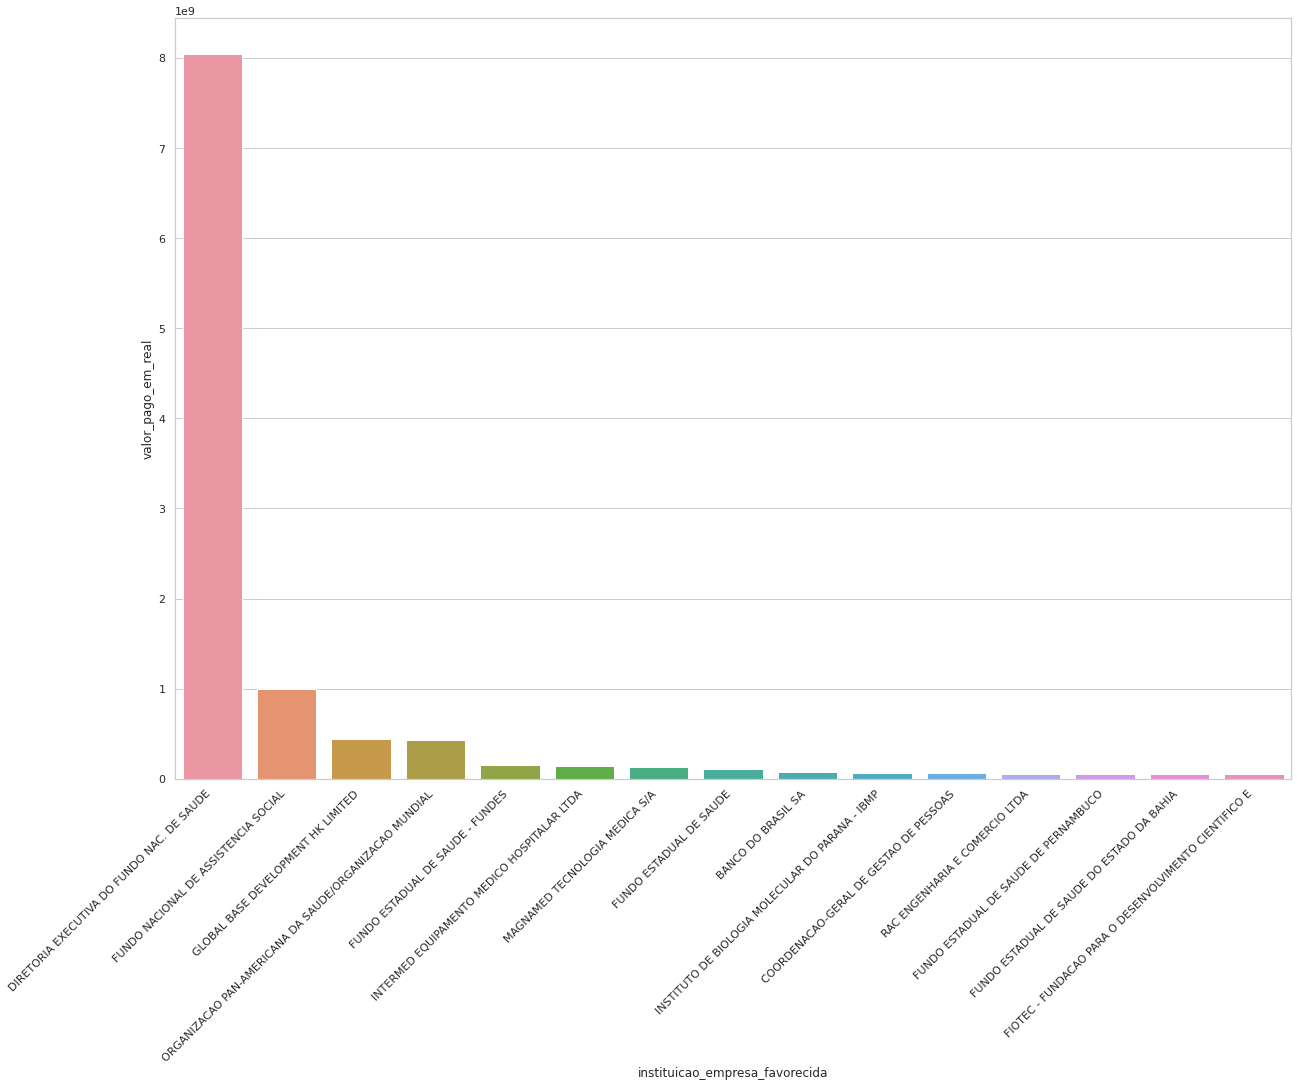

In [66]:
sns.set(style="whitegrid")

fig_dims = (20, 14)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation=45, ha='right')

ax = sns.barplot(x="instituicao_empresa_favorecida", y="valor_pago_em_real", data=graf)

In [67]:
# Soma valores em sigilo

In [68]:
sigilo = pagamentos_covid19[(pagamentos_covid19['Favorecido_x'] == 'Informação protegida por sigilo nos termos da legislaçã') |  
                           (pagamentos_covid19['Código Favorecido_x'] == '-11')]

In [69]:
sigilo['valor_pago_em_real'].sum()

946544.69

In [70]:
# Máximo em sigilo

In [71]:
sigilo.loc[sigilo['valor_pago_em_real'].idxmax()][["Data Emissão_x","Código Empenho", "Id Empenho", "Código Empenho Resumido", "Órgão_x", "Unidade Gestora_x", "Código Favorecido_x", "Favorecido_x", "Valor do Empenho Convertido pra R$", "valor_pago_em_real", "Valor Restos a Pagar Inscritos (R$)", "Observação_x", "Observação_y",  "Modalidade de Licitação"]]

Data Emissão_x                                                                02/04/2020
Código Empenho                                                   160062000012020NE000055
Id Empenho                                                                     184000107
Código Empenho Resumido                                                     2020NE000055
Órgão_x                                                              Comando do Exército
Unidade Gestora_x                                     CENTRO DE INTELIGENCIA DO EXERCITO
Código Favorecido_x                                                                  -11
Favorecido_x                           Informação protegida por sigilo nos termos da ...
Valor do Empenho Convertido pra R$                                            380,000.00
valor_pago_em_real                                                            380,000.00
Valor Restos a Pagar Inscritos (R$)                                                 0.00
Observação_x         

In [72]:
# Soma valores por autores de Emenda

In [73]:
emendas = pagamentos_covid19[(pagamentos_covid19['Autor Emenda'] != 'SEM EMENDA')]

In [74]:
emendas['valor_pago_em_real'].sum()

1482322058.0

In [75]:
emendas.groupby(["Autor Emenda"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False).head(20)

,Autor Emenda,valor_pago_em_real
33,BANCADA DO CEARA / EMENDA 14,"180,966,340.00"
0,BANCADA DA BAHIA / EMENDA 4,"126,904,898.00"
32,BANCADA DO AMAZONAS / EMENDA 5,"116,834,308.00"
16,BANCADA DE SAO PAULO / EMENDA 1,"105,421,280.00"
37,BANCADA DO MARANHAO / EMENDA 3,"80,952,724.00"
7,BANCADA DE GOIAS / EMENDA 7,"76,803,508.00"
38,BANCADA DO RIO DE JANEIRO / EMENDA 2,"53,215,190.00"
34,BANCADA DO DISTRITO FEDERAL / EMENDA 3,"50,437,829.00"
15,BANCADA DE RORAIMA / EMENDA 9,"49,014,018.00"
26,BANCADA DE SERGIPE / EMENDA 8,"46,185,111.00"


In [76]:
# Salva em CSV para gráfico

In [77]:
salva = emendas.groupby(["Autor Emenda"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False)

In [78]:
salva.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 33 to 20
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Autor Emenda        50 non-null     object 
 1   valor_pago_em_real  50 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


In [79]:
salva.to_csv('resultados/graficos/soma_ordenada_emendas_pagamentos_feitos_de_empenhos_covid19_ate_12_junho_2020.csv', index=False)